In [1]:
import pandas as pd

df = pd.read_csv('/content/train.csv')

print('First 5 rows of the DataFrame:')
print(df.head())

print('\nConcise summary of the DataFrame:')
df.info()

print('\nDescriptive statistics of the DataFrame:')
print(df.describe())

First 5 rows of the DataFrame:
   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            

/tmp/ipython-input-3205579024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df, palette='viridis')


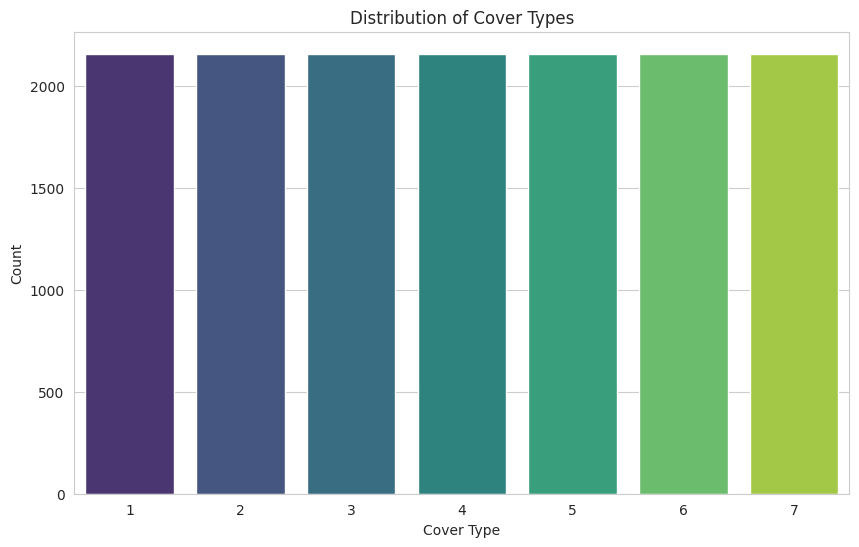

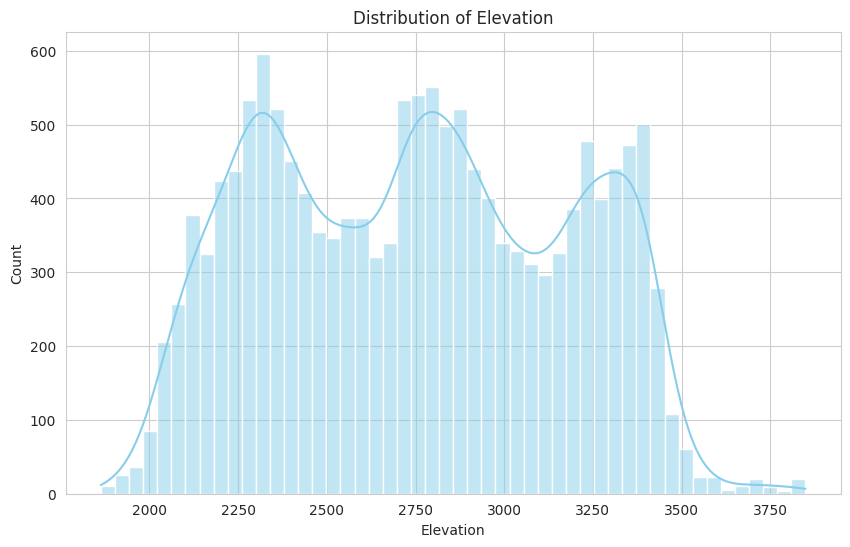

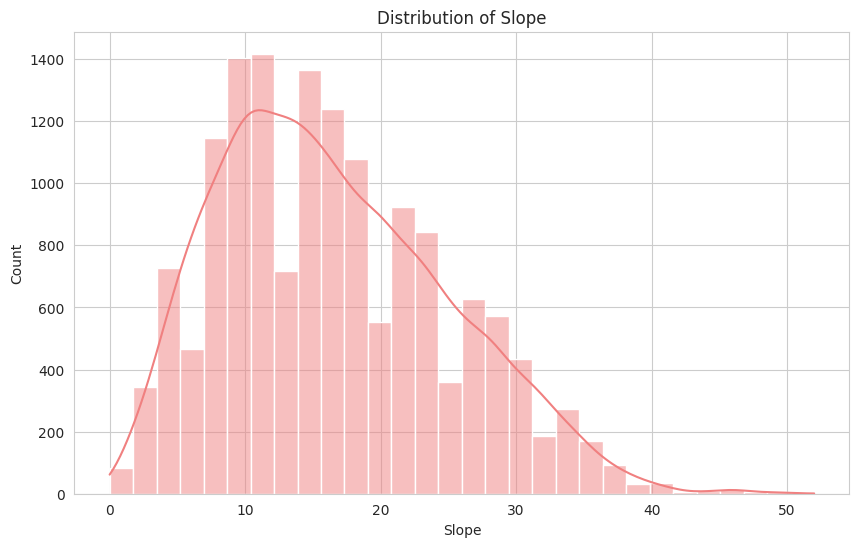

/tmp/ipython-input-3205579024.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette='Spectral')


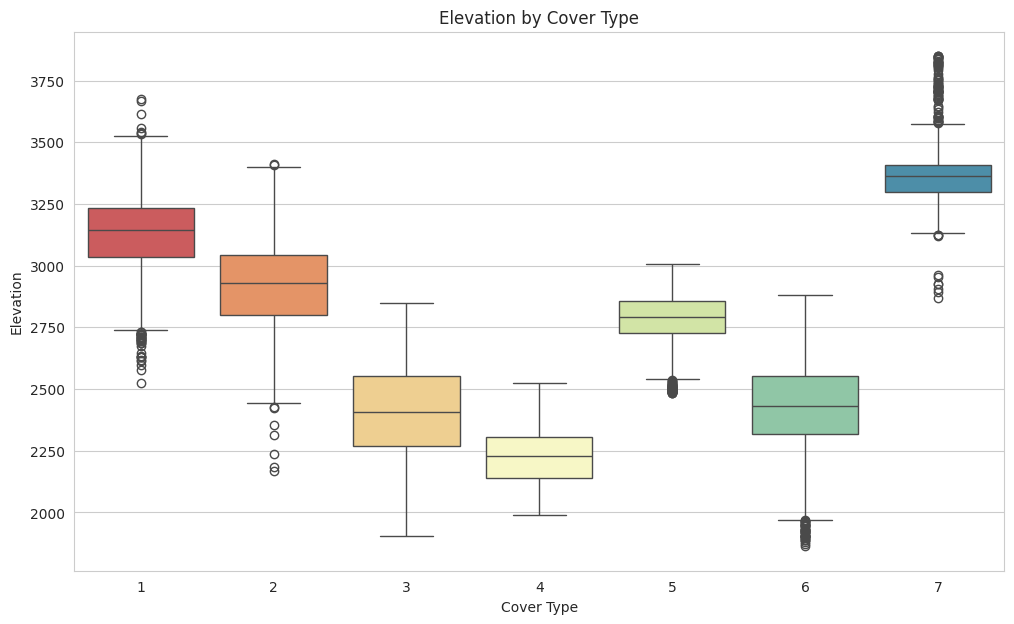

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")

# 1. Distribution of Cover_Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df, palette='viridis')
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Elevation
plt.figure(figsize=(10, 6))
sns.histplot(df['Elevation'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Elevation')
plt.xlabel('Elevation')
plt.ylabel('Count')
plt.show()

# 3. Distribution of Slope
plt.figure(figsize=(10, 6))
sns.histplot(df['Slope'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Slope')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

# 4. Box plot of Elevation by Cover_Type
plt.figure(figsize=(12, 7))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette='Spectral')
plt.title('Elevation by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.show()

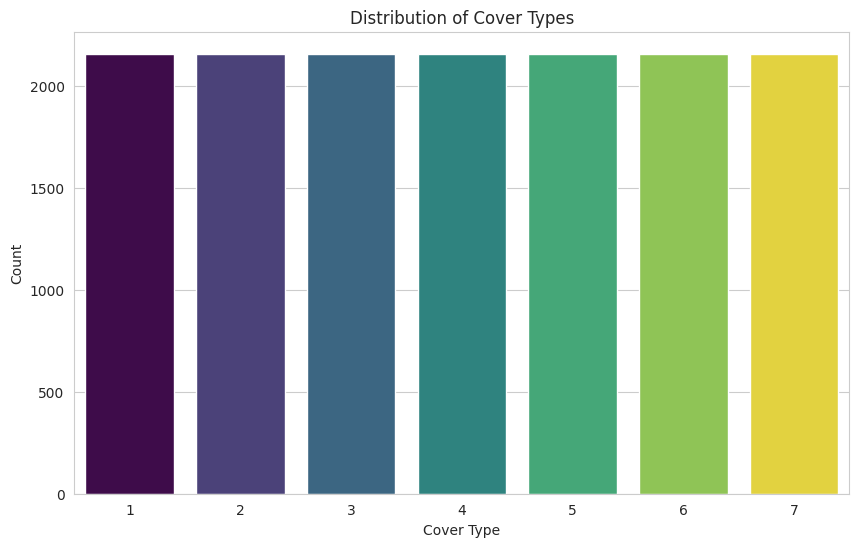

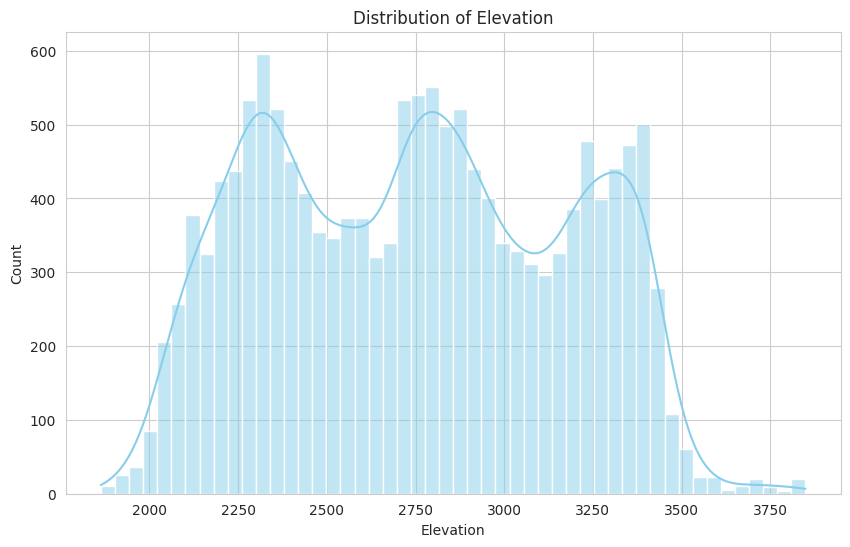

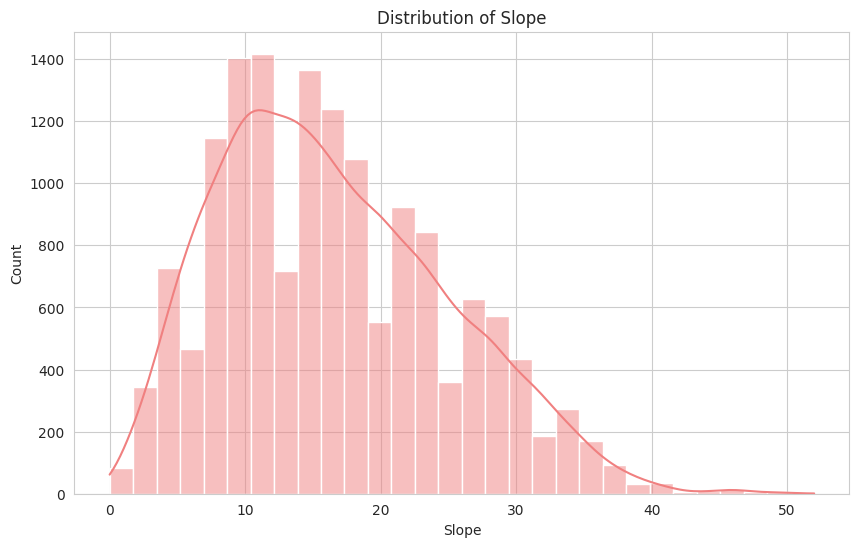

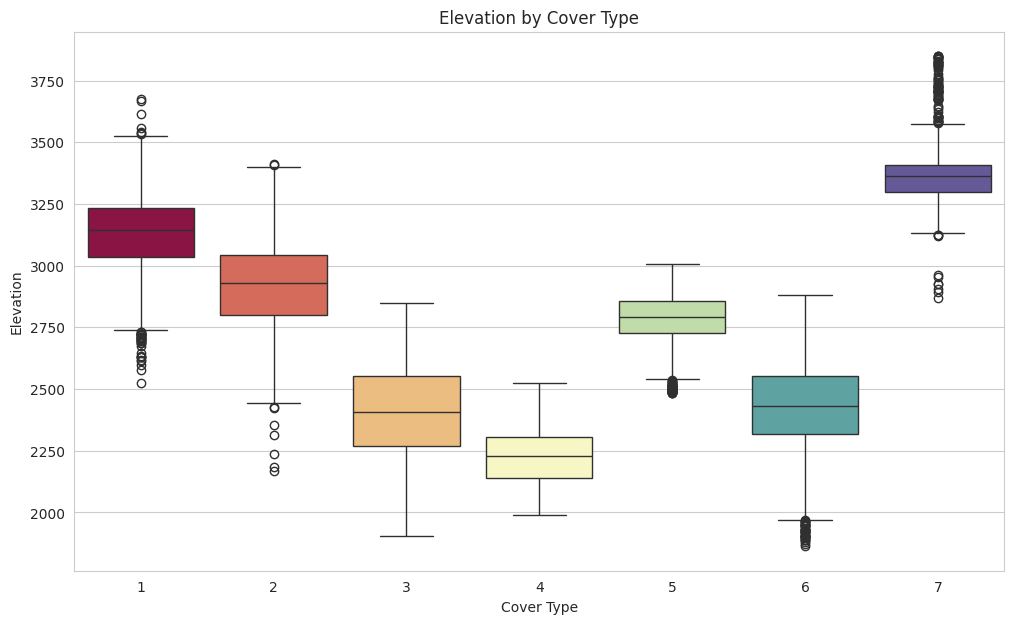

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")

# 1. Distribution of Cover_Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df, hue='Cover_Type', palette='viridis', legend=False)
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Elevation
plt.figure(figsize=(10, 6))
sns.histplot(df['Elevation'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Elevation')
plt.xlabel('Elevation')
plt.ylabel('Count')
plt.show()

# 3. Distribution of Slope
plt.figure(figsize=(10, 6))
sns.histplot(df['Slope'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Slope')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

# 4. Box plot of Elevation by Cover_Type
plt.figure(figsize=(12, 7))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, hue='Cover_Type', palette='Spectral', legend=False)
plt.title('Elevation by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['Cover_Type', 'Id'])
y = df['Cover_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('\nFirst 5 rows of X_train:')
print(X_train.head())
print('\nFirst 5 rows of y_train:')
print(y_train.head())

X_train shape: (12096, 54)
X_test shape: (3024, 54)
y_train shape: (12096,)
y_test shape: (3024,)

First 5 rows of X_train:
       Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
14128       2942     151     27                               376   
4425        2869     299      9                                90   
909         2928     294      6                               216   
5123        2827     144     18                               120   
10901       2559     336     14                                30   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
14128                             191                             1928   
4425                              -11                             1670   
909                                21                             5075   
5123                               24                             2255   
10901                              12                             2006   

       Hillshade

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the classifier
model.fit(X_train, y_train)

print('RandomForestClassifier model trained successfully.')

RandomForestClassifier model trained successfully.


Model Evaluation Metrics:
Accuracy: 0.8552
Precision: 0.8522
Recall: 0.8552
F1-Score: 0.8524

Confusion Matrix:


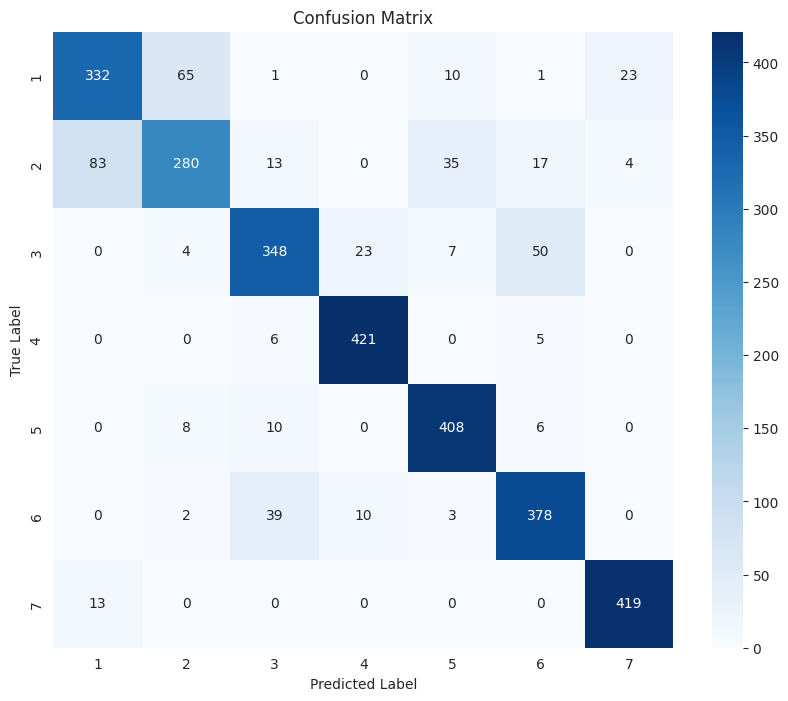

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print('Model Evaluation Metrics:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

print('\nConfusion Matrix:')
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/tmp/ipython-input-3537529772.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')


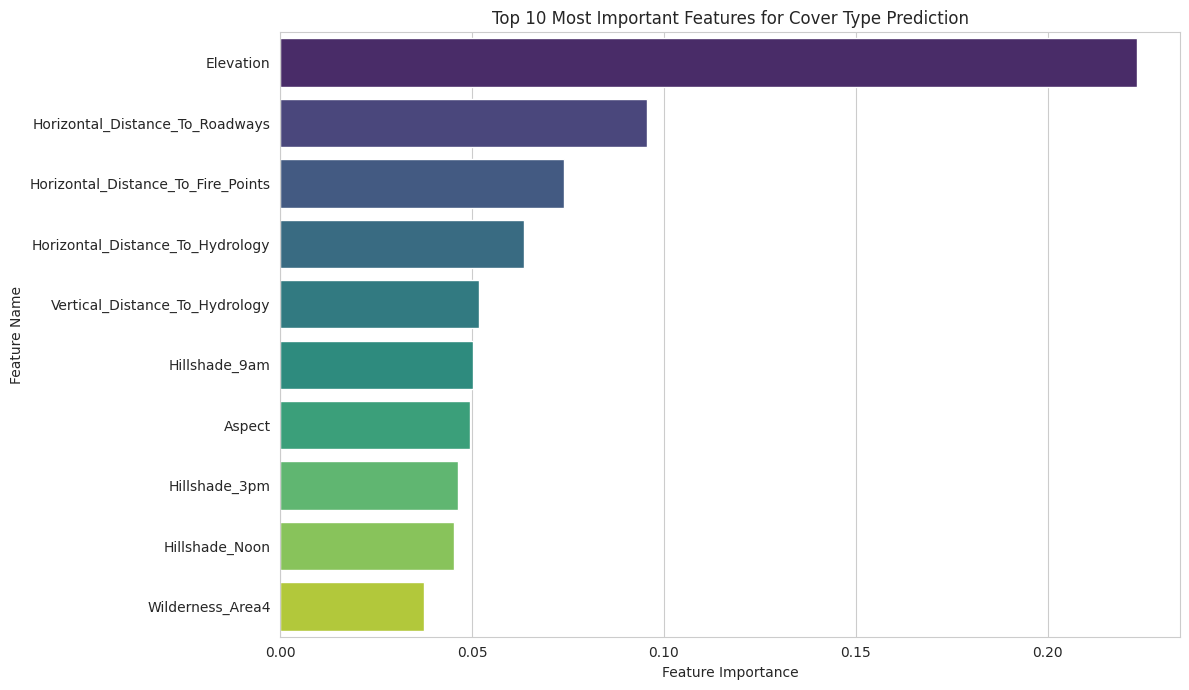

Top 10 Most Important Features:
Elevation                             0.223352
Horizontal_Distance_To_Roadways       0.095550
Horizontal_Distance_To_Fire_Points    0.074043
Horizontal_Distance_To_Hydrology      0.063634
Vertical_Distance_To_Hydrology        0.051701
Hillshade_9am                         0.050327
Aspect                                0.049419
Hillshade_3pm                         0.046229
Hillshade_Noon                        0.045409
Wilderness_Area4                      0.037455
dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract feature importances
feature_importances = model.feature_importances_

# 2. Create a Pandas Series with feature names as index
feature_names = X_train.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort the feature importances in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# 4. Select the top 10 most important features
top_10_features = sorted_feature_importance.head(10)

# 5. Create a bar plot of the top 10 feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Most Important Features for Cover Type Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()

# 6. Display the plot
plt.show()

print('Top 10 Most Important Features:')
print(top_10_features)

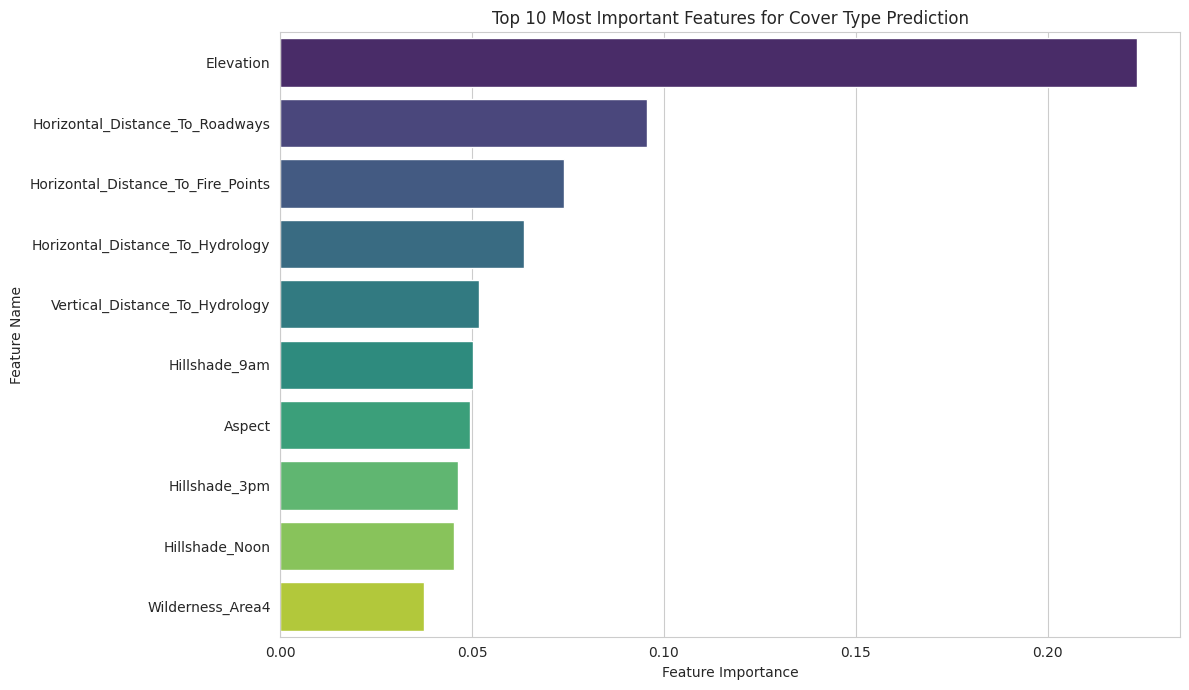

Top 10 Most Important Features:
Elevation                             0.223352
Horizontal_Distance_To_Roadways       0.095550
Horizontal_Distance_To_Fire_Points    0.074043
Horizontal_Distance_To_Hydrology      0.063634
Vertical_Distance_To_Hydrology        0.051701
Hillshade_9am                         0.050327
Aspect                                0.049419
Hillshade_3pm                         0.046229
Hillshade_Noon                        0.045409
Wilderness_Area4                      0.037455
dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract feature importances
feature_importances = model.feature_importances_

# 2. Create a Pandas Series with feature names as index
feature_names = X_train.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort the feature importances in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# 4. Select the top 10 most important features
top_10_features = sorted_feature_importance.head(10)

# 5. Create a bar plot of the top 10 feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis', hue=top_10_features.index, legend=False)
plt.title('Top 10 Most Important Features for Cover Type Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()

# 6. Display the plot
plt.show()

print('Top 10 Most Important Features:')
print(top_10_features)